# Load Library and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib, scipy
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf

TypeError: descriptor '__call__' for 'type' objects doesn't apply to a 'property' object

In [2]:
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/Colab Notebooks/star_classification.csv'

# Read the CSV file into a DataFrame
df_source = pd.read_csv(file_path)
df_source

Mounted at /content/drive


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [3]:
# Dropping ID columns
df = df_source.copy(deep = True)
df = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'class']]
df

,alpha,delta,u,g,r,i,z,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   redshift  100000 non-null  float64
 8   class     100000 non-null  object 
dtypes: float64(8), object(1)
memory usage: 6.9+ MB


In [5]:
df.describe()

,alpha,delta,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [6]:
df.duplicated().any()

False

In [7]:
df.isnull().any()

,0
alpha,False
delta,False
u,False
g,False
r,False
i,False
z,False
redshift,False
class,False


In [8]:
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

alpha: 99999
delta: 99999
u: 93748
g: 92651
r: 91901
i: 92019
z: 92007
redshift: 99295
class: 3


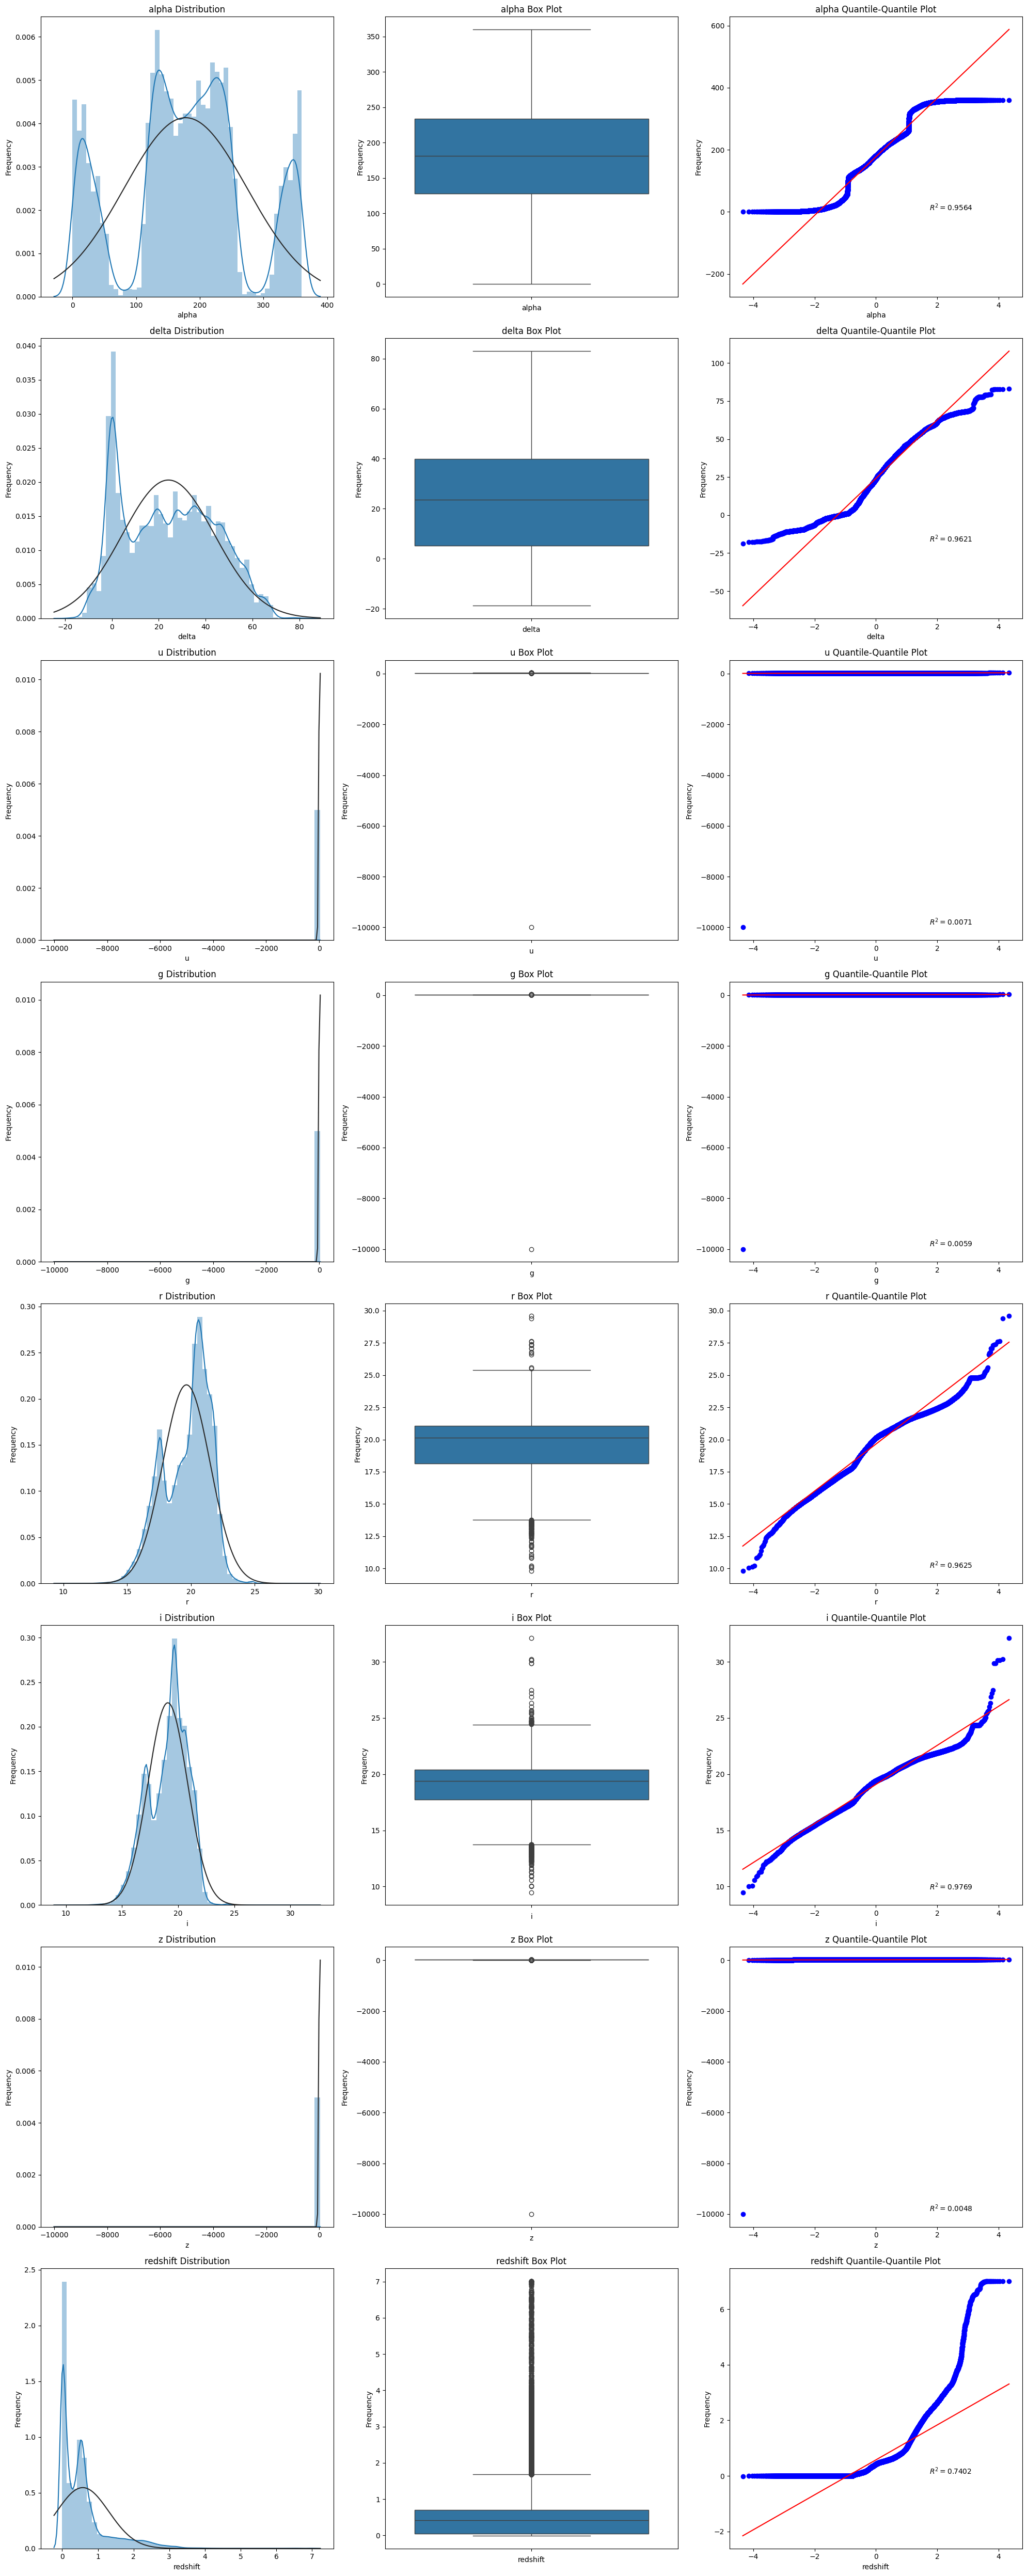

In [9]:
plt.figure(figsize=(20,50))
pos = 1
for col in df.columns:
    if col not in ['class']:
      plt.subplot(8,3,pos)
      sns.distplot(df[col], fit=norm)
      plt.title(f'{col} Distribution')
      plt.xlabel(f'{col}')
      plt.ylabel('Frequency')
      pos +=1
      plt.subplot(8,3,pos)
      sns.boxplot(df[col])
      plt.title(f'{col} Box Plot')
      plt.xlabel(f'{col}')
      plt.ylabel('Frequency')
      pos +=1
      plt.subplot(8,3,pos)
      scipy.stats.probplot(df[col],plot=plt,rvalue=True)
      plt.title(f'{col} Quantile-Quantile Plot')
      plt.xlabel(f'{col}')
      plt.ylabel('Frequency')
      pos +=1
plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import skew, kurtosis

numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
kurtosis_feats = df[numeric_feats].apply(lambda x: kurtosis(x.dropna())).sort_values(ascending=False)

print("\nSkewness and Kurtosis in numerical features: \n")
skewness_kurtosis = pd.DataFrame({'Skewness' : skewed_feats, 'Kurtosis' : kurtosis_feats})
skewness_kurtosis


Skewness and Kurtosis in numerical features: 



,Skewness,Kurtosis
alpha,-0.028510,-0.537224
delta,0.175076,-1.043070
g,-314.271980,99173.188446
i,-0.404161,-0.234893
r,-0.507851,-0.376199
redshift,2.523568,9.972357
u,-313.844535,98993.415248
z,-314.754697,99376.376185


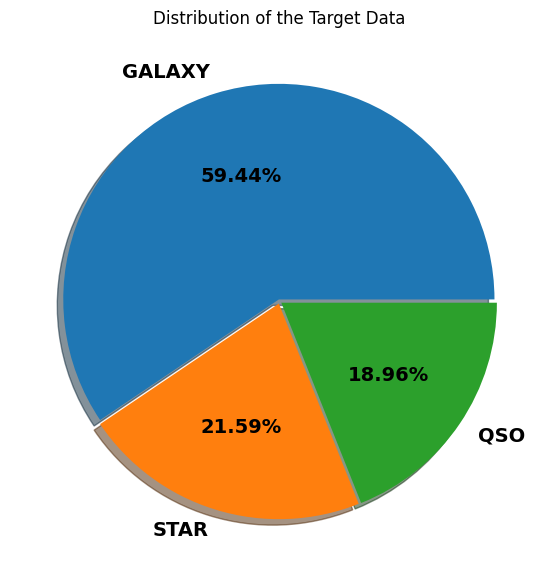

In [11]:
# Prepare data for the pie chart
labels = df['class'].value_counts().keys()
values = df['class'].value_counts().values
explode = (0.01, 0.01, 0.01)  # Example to explode the first slice

# Create the pie chart
plt.figure(figsize=(13, 7))
plt.pie(values, labels=labels, textprops={'fontsize': 14, 'fontweight': 'bold'}, explode=explode, shadow=True, autopct='%1.2f%%')
plt.title('Distribution of the Target Data')
plt.show()


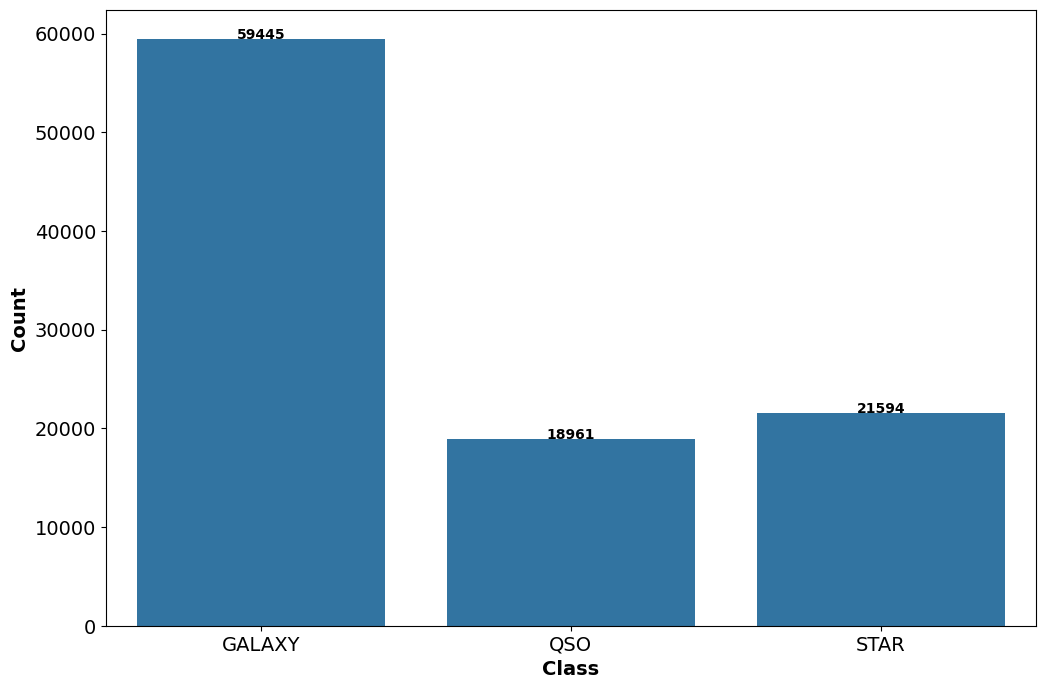

In [12]:
# Create the count plot
plt.figure(figsize=(12, 8))
count_plot = sns.countplot(x='class', data=df)

# Add annotations
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', fontweight='bold')

# plt.title('Count Plot with Annotations', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Set font properties for the axis tick labels
plt.xticks(fontsize=14, )
plt.yticks(fontsize=14, )

plt.show()

In [13]:
# Create the pairplot with hue based on 'class' and using the custom palette
plt.figure(figsize=(30, 8))
pair_plot = sns.pairplot(df.sample(n=10000), hue='class')

# Title
plt.suptitle('Pair Plot with Hue Colored by Class', y=1.02)

# Show the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

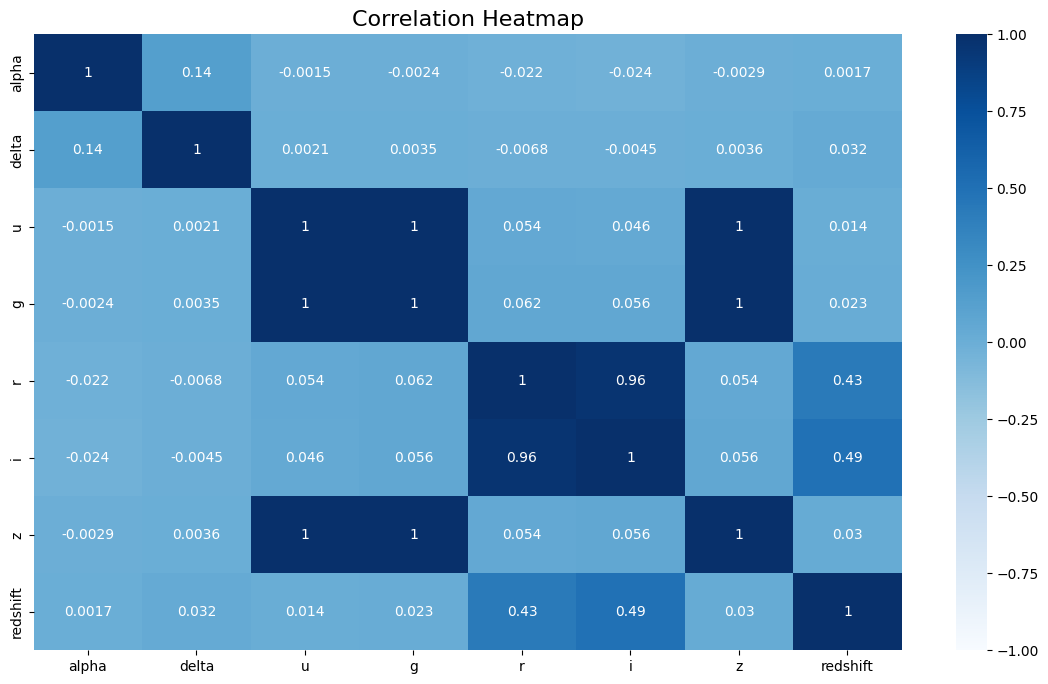

In [14]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Remove unnecessary features

In [15]:
df_drop = df.drop(columns = ['g', 'r', 'z'])

<Figure size 1200x800 with 0 Axes>

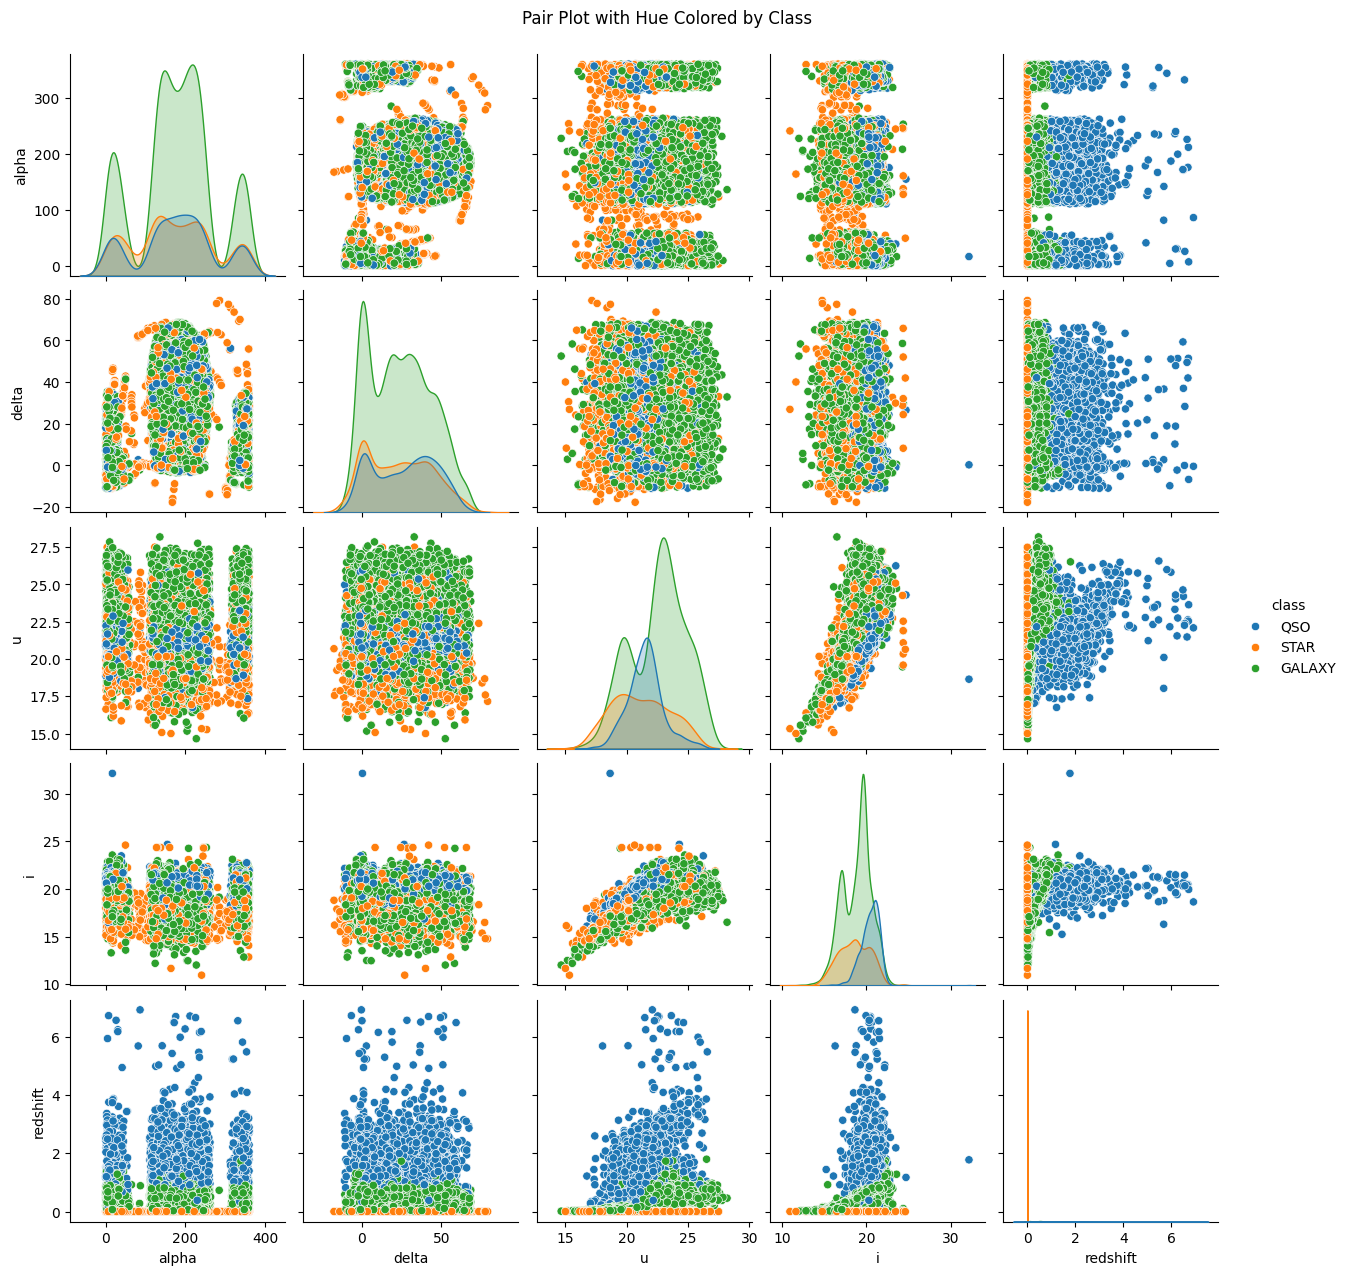

In [16]:
# Create the pairplot with hue based on 'class'
plt.figure(figsize=(12, 8))
pair_plot = sns.pairplot(df_drop.sample(n=10000), hue='class')
# Title
plt.suptitle('Pair Plot with Hue Colored by Class', y=1.02)

# Show the plot
plt.show()

In [17]:
df_drop

,alpha,delta,u,i,redshift,class
0,135.689107,32.494632,23.87882,19.16573,0.634794,GALAXY
1,144.826101,31.274185,24.77759,21.16812,0.779136,GALAXY
2,142.188790,35.582444,25.26307,19.34857,0.644195,GALAXY
3,338.741038,-0.402828,22.13682,20.50454,0.932346,GALAXY
4,345.282593,21.183866,19.43718,15.97711,0.116123,GALAXY
...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,21.30548,0.000000,GALAXY
99996,29.493819,19.798874,22.69118,19.75759,0.404895,GALAXY
99997,224.587407,15.700707,21.16916,17.69034,0.143366,GALAXY
99998,212.268621,46.660365,25.35039,19.07254,0.455040,GALAXY


# Outlier Treatment

In [18]:
from scipy.stats import skew, kurtosis

numeric_feats = df_drop.select_dtypes('number').columns

skewed_feats = df_drop[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
kurtosis_feats = df_drop[numeric_feats].apply(lambda x: kurtosis(x.dropna())).sort_values(ascending=False)

print("\nSkewness and Kurtosis in numerical features: \n")
skewness_kurtosis = pd.DataFrame({'Skewness' : skewed_feats, 'Kurtosis' : kurtosis_feats})
skewness_kurtosis


Skewness and Kurtosis in numerical features: 



,Skewness,Kurtosis
alpha,-0.028510,-0.537224
delta,0.175076,-1.043070
i,-0.404161,-0.234893
redshift,2.523568,9.972357
u,-313.844535,98993.415248


## IQR

In [19]:
df_IQR = df_drop.copy()

In [20]:
df_IQR.describe()

,alpha,delta,u,i,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,19.084854,0.576661
std,96.502241,19.644665,31.769291,1.757895,0.730707
min,0.005528,-18.785328,-9999.000000,9.469903,-0.009971
25%,127.518222,5.146771,20.352353,17.732285,0.054517
50%,180.900700,23.645922,22.179135,19.405145,0.424173
75%,233.895005,39.901550,23.687440,20.396495,0.704154
max,359.999810,83.000519,32.781390,32.141470,7.011245


In [21]:
for col in df_IQR.select_dtypes('number').columns:
    lower_limit, upper_limit = df_IQR[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    df_IQR[col] = np.where(df_IQR[col]>upper_whisker,upper_whisker,np.where(df_IQR[col]<lower_whisker,lower_whisker,df_IQR[col]))

In [22]:
df_IQR.describe()

,alpha,delta,u,i,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,22.080882,19.085571,0.508544
std,96.502241,19.644665,2.249611,1.750812,0.521890
min,0.005528,-18.785328,15.349721,13.735970,-0.009971
25%,127.518222,5.146771,20.352353,17.732285,0.054517
50%,180.900700,23.645922,22.179135,19.405145,0.424173
75%,233.895005,39.901550,23.687440,20.396495,0.704154
max,359.999810,83.000519,28.690071,24.392810,1.678611


In [23]:
from scipy.stats import skew, kurtosis

numeric_feats = df_IQR.select_dtypes('number').columns

skewed_feats = df_IQR[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
kurtosis_feats = df_IQR[numeric_feats].apply(lambda x: kurtosis(x.dropna())).sort_values(ascending=False)

print("\nSkewness and Kurtosis in numerical features: \n")
skewness_kurtosis_IQR = pd.DataFrame({'Skewness' : skewed_feats, 'Kurtosis' : kurtosis_feats})
skewness_kurtosis_IQR


Skewness and Kurtosis in numerical features: 



,Skewness,Kurtosis
alpha,-0.028510,-0.537224
delta,0.175076,-1.043070
i,-0.402442,-0.448767
redshift,1.053927,0.112576
u,-0.066742,-0.566120


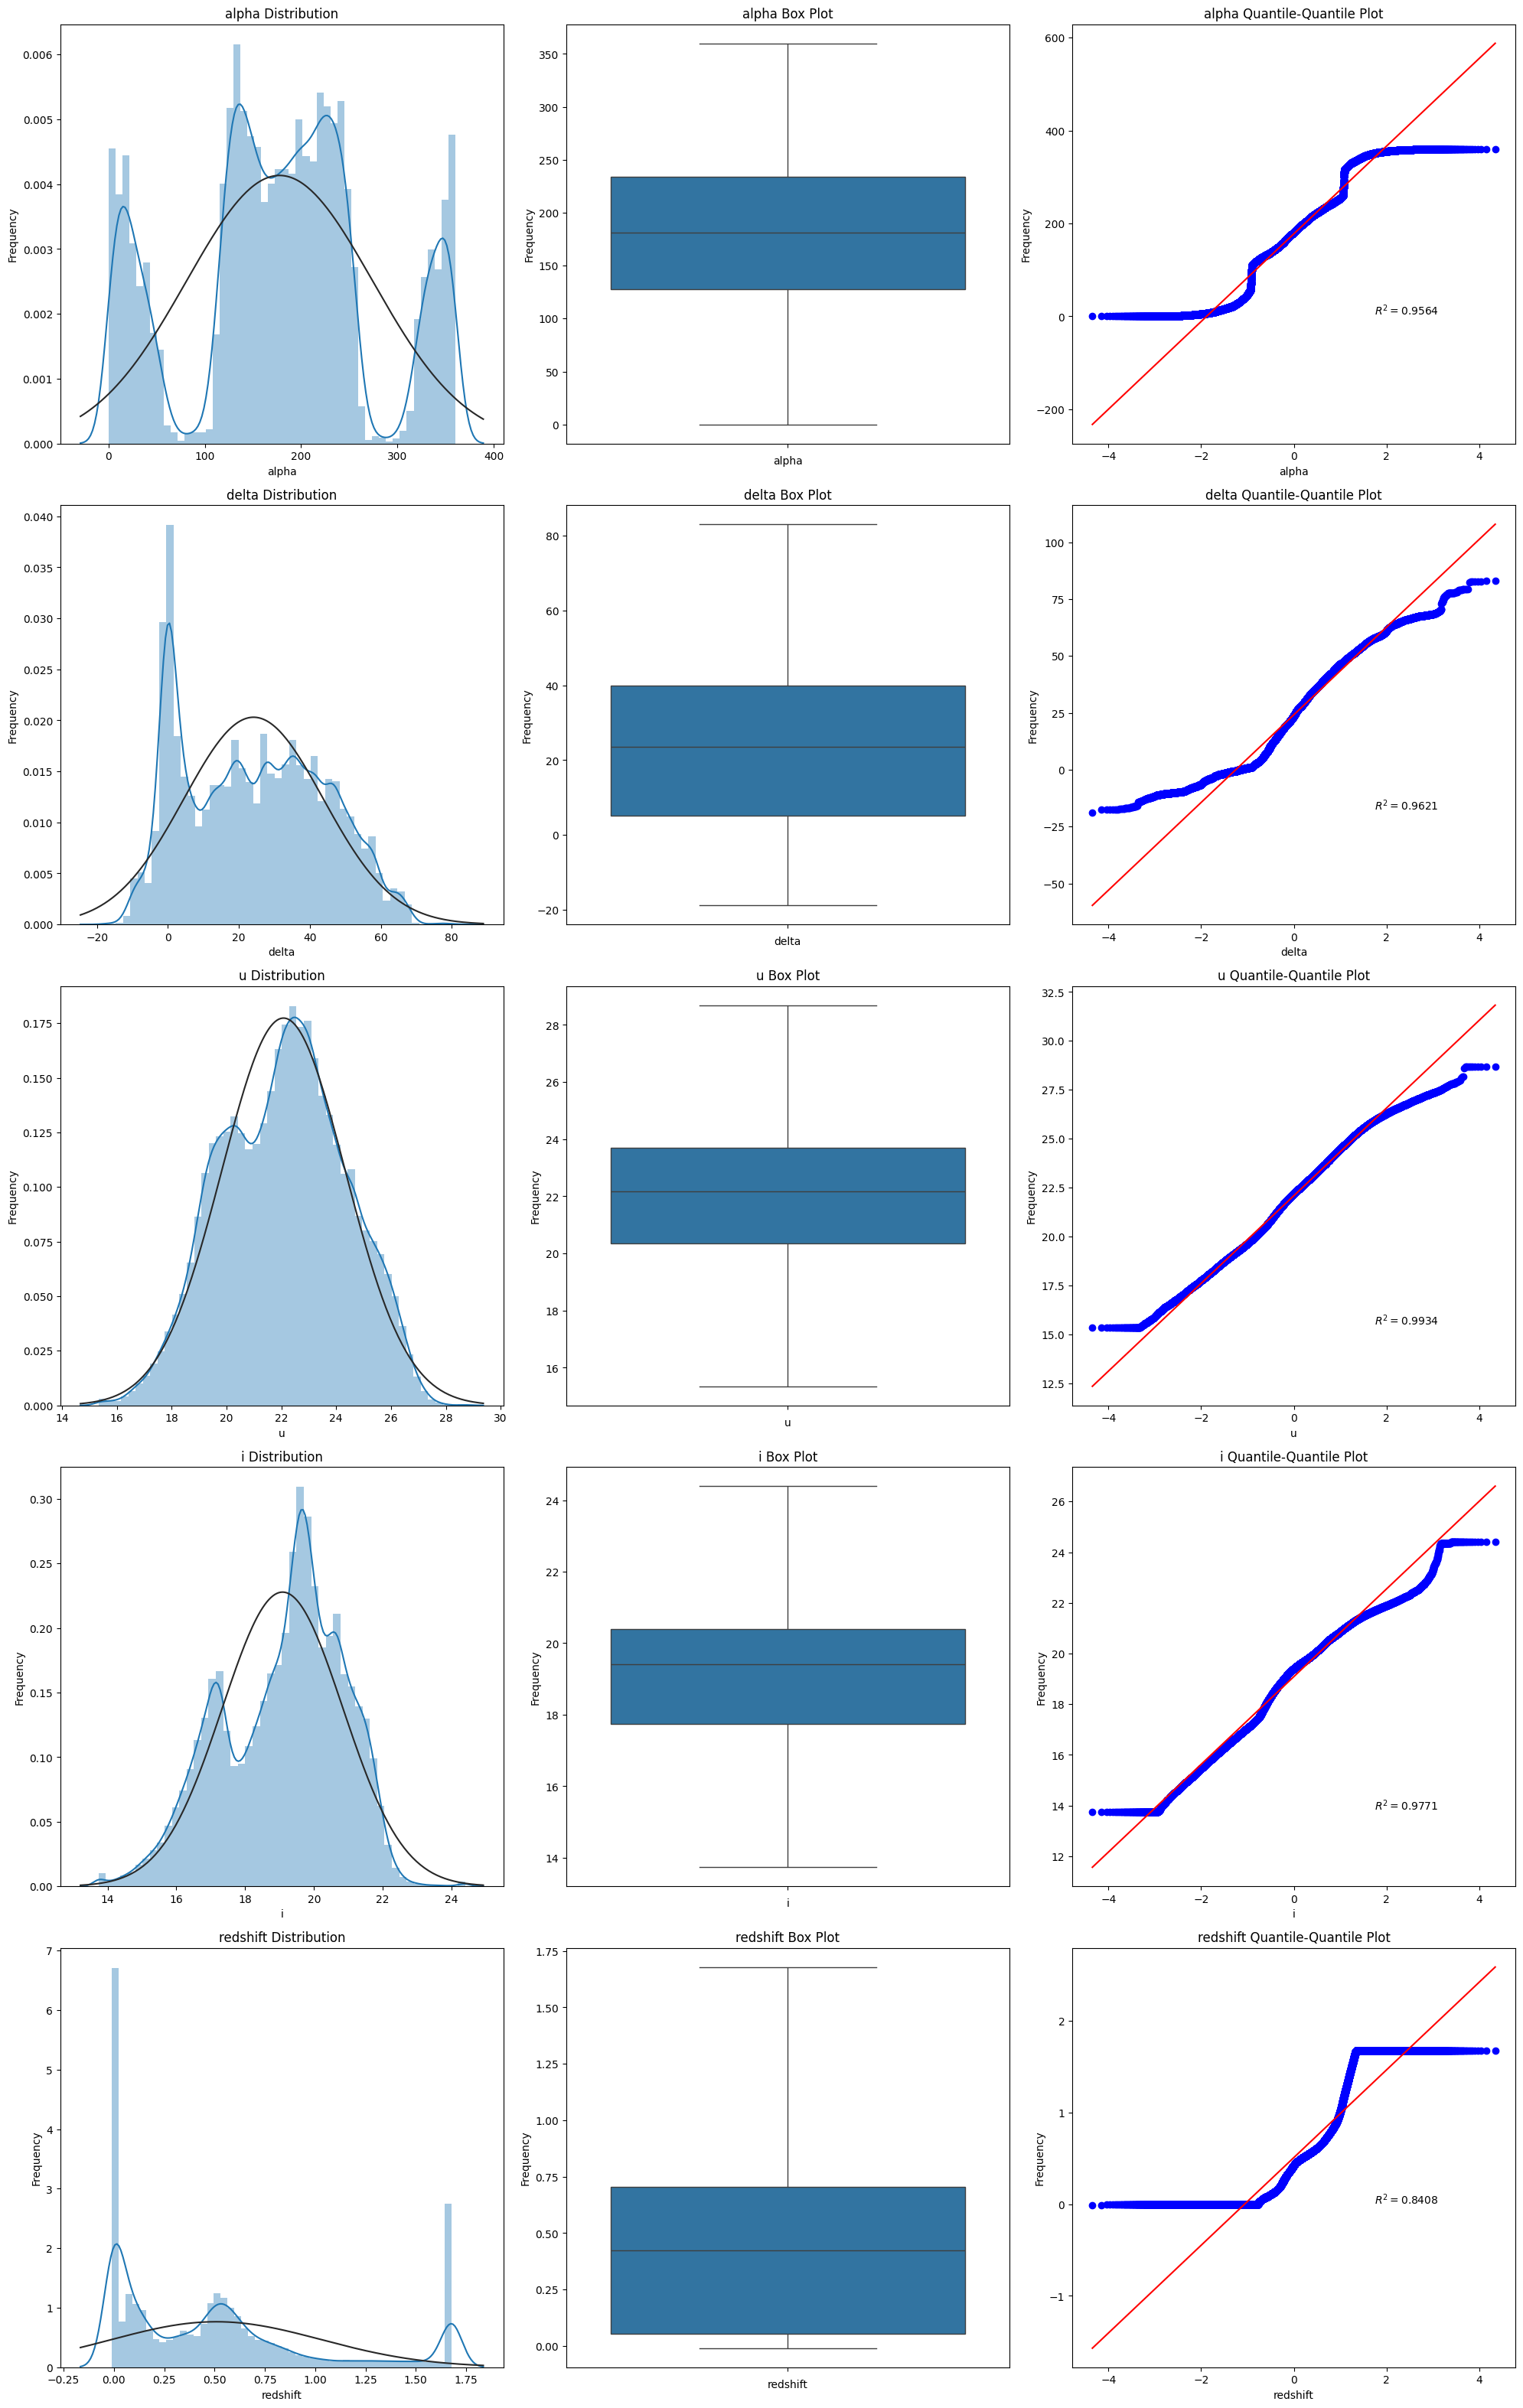

In [24]:
plt.figure(figsize=(20,50))
pos = 1
for col in df_IQR.columns:
    if col not in ['class']:
      plt.subplot(8,3,pos)
      sns.distplot(df_IQR[col], fit=norm)
      plt.title(f'{col} Distribution')
      plt.xlabel(f'{col}')
      plt.ylabel('Frequency')
      pos +=1
      plt.subplot(8,3,pos)
      sns.boxplot(df_IQR[col])
      plt.title(f'{col} Box Plot')
      plt.xlabel(f'{col}')
      plt.ylabel('Frequency')
      pos +=1
      plt.subplot(8,3,pos)
      scipy.stats.probplot(df_IQR[col],plot=plt,rvalue=True)
      plt.title(f'{col} Quantile-Quantile Plot')
      plt.xlabel(f'{col}')
      plt.ylabel('Frequency')
      pos +=1
plt.tight_layout()
plt.show()

## Log Transformation

In [25]:
df_LT = df_drop.copy()

In [26]:
# Iterate through each column in the DataFrame
for col in df_LT.select_dtypes(exclude = 'object').columns:
    # Apply log transformation to the column
    df_LT[col] = np.log(df_LT[col] + 1)  # Adding 1 to handle zero values if present

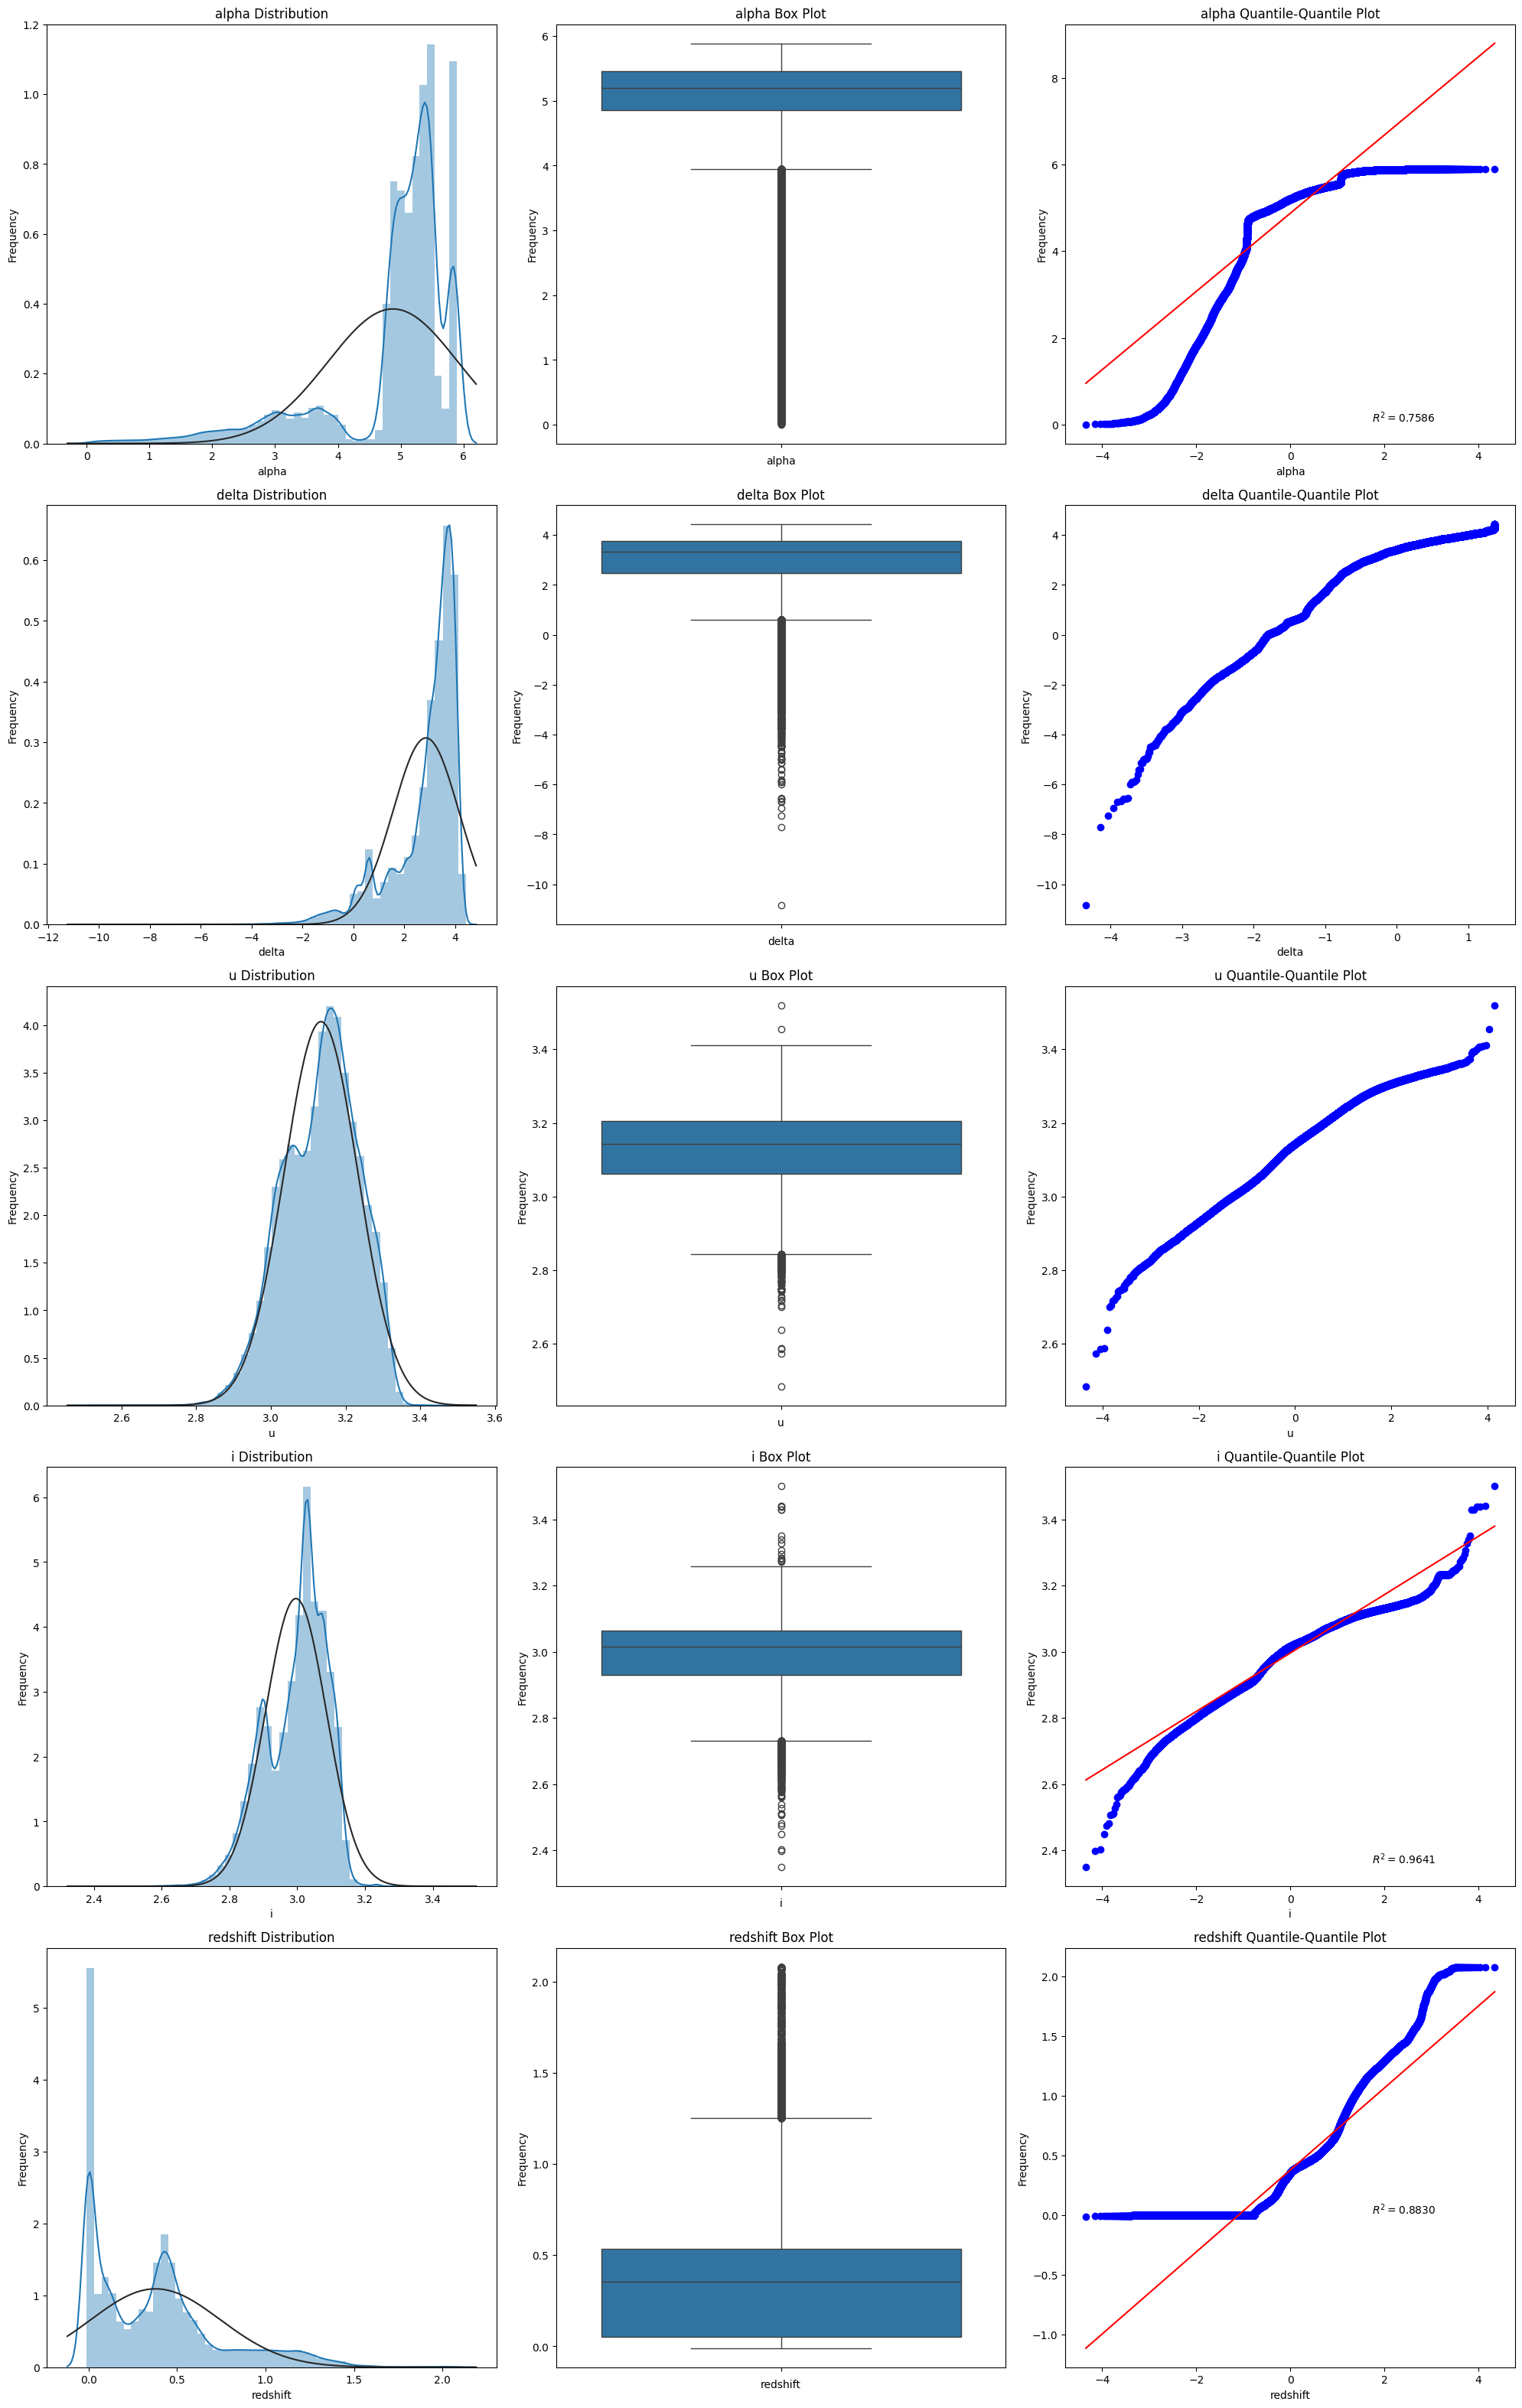

In [27]:
plt.figure(figsize=(20,50))
pos = 1
for col in df_LT.columns:
    if col not in ['class']:
      plt.subplot(8,3,pos)
      sns.distplot(df_LT[col], fit=norm)
      plt.title(f'{col} Distribution')
      plt.xlabel(f'{col}')
      plt.ylabel('Frequency')
      pos +=1
      plt.subplot(8,3,pos)
      sns.boxplot(df_LT[col])
      plt.title(f'{col} Box Plot')
      plt.xlabel(f'{col}')
      plt.ylabel('Frequency')
      pos +=1
      plt.subplot(8,3,pos)
      scipy.stats.probplot(df_LT[col],plot=plt,rvalue=True)
      plt.title(f'{col} Quantile-Quantile Plot')
      plt.xlabel(f'{col}')
      plt.ylabel('Frequency')
      pos +=1
plt.tight_layout()
plt.show()

## Dividing the dataset into Feature and Target

In [28]:
X = df_IQR.drop('class',axis=1)
y = df_IQR['class']

# Spliting Training and Test data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

# SMOTE

In [30]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
y_train_resampled.describe(include = 'object')

,class
count,142668
unique,3
top,QSO
freq,47556


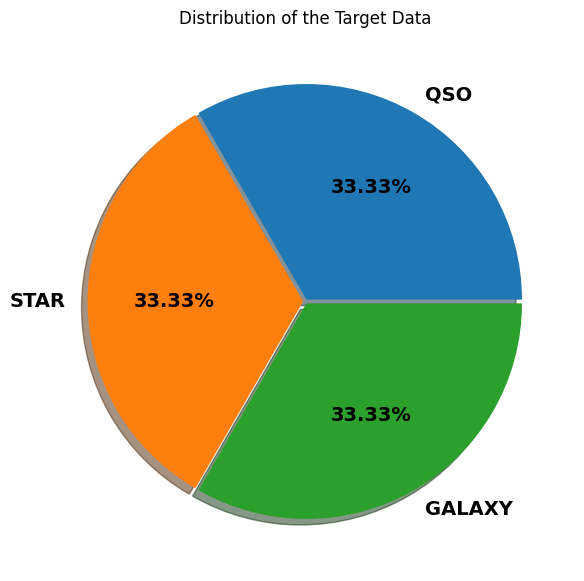

In [32]:
# Prepare data for the pie chart
labels = y_train_resampled.value_counts().keys()
values = y_train_resampled.value_counts().values
explode = (0.01, 0.01, 0.01)  # Example to explode the first slice

# Create the pie chart
plt.figure(figsize=(13, 7))
plt.pie(values, labels=labels, textprops={'fontsize': 14, 'fontweight': 'bold'}, explode=explode, shadow=True, autopct='%1.2f%%')
plt.title('Distribution of the Target Data')
plt.show()

# FEATURE SCALING

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train_resampled)
x_test = scaler.transform(X_test)

In [34]:
x_train = pd.DataFrame(x_train, columns = X_train_resampled.columns)
x_test = pd.DataFrame(x_test, columns = X_test.columns)

In [35]:
y_train = y_train_resampled.copy()
y_train = y_train.replace({'GALAXY': 0, 'QSO': 1, 'STAR': 2})
y_test = y_test.replace({'GALAXY': 0, 'QSO': 1, 'STAR': 2})

# Modeling & Training

## Logistic Regression with Multinomial

Accuracy: 0.94515
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     11889
           1       0.88      0.91      0.90      3792
           2       0.93      1.00      0.97      4319

    accuracy                           0.95     20000
   macro avg       0.93      0.95      0.94     20000
weighted avg       0.95      0.95      0.95     20000



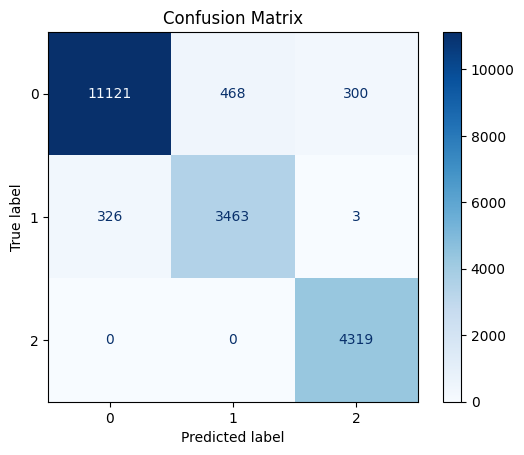

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Train the Logistic Regression model
LR = LogisticRegression(multi_class='multinomial').fit(x_train, y_train)

# Make predictions
LR_prediction = LR.predict(x_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, LR_prediction))

# Print classification report
print(classification_report(y_test, LR_prediction))

# Compute confusion matrix
cm = confusion_matrix(y_test, LR_prediction)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()


## Logistic Regression with One Vs Rest

Accuracy : 0.91635
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     11889
           1       0.78      0.94      0.85      3792
           2       0.91      1.00      0.95      4319

    accuracy                           0.92     20000
   macro avg       0.89      0.94      0.91     20000
weighted avg       0.93      0.92      0.92     20000



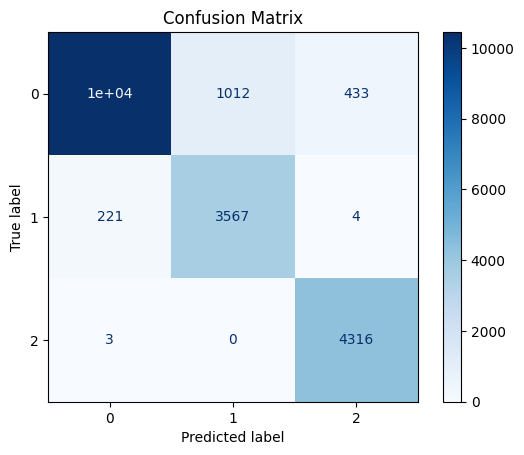

In [37]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the OneVsRestClassifier with Logistic Regression
LR_OVR = OneVsRestClassifier(LogisticRegression()).fit(x_train, y_train)

# Make predictions
LR_OVR_prediction = LR_OVR.predict(x_test)

# Print accuracy
print("Accuracy :", accuracy_score(y_test, LR_OVR_prediction))

# Print classification report
print(classification_report(y_test, LR_OVR_prediction))

# Compute confusion matrix
cm = confusion_matrix(y_test, LR_OVR_prediction)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()



## Logistic Regression with One Vs One

Accuracy : 0.94415
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11889
           1       0.88      0.91      0.90      3792
           2       0.93      1.00      0.96      4319

    accuracy                           0.94     20000
   macro avg       0.93      0.95      0.94     20000
weighted avg       0.95      0.94      0.94     20000



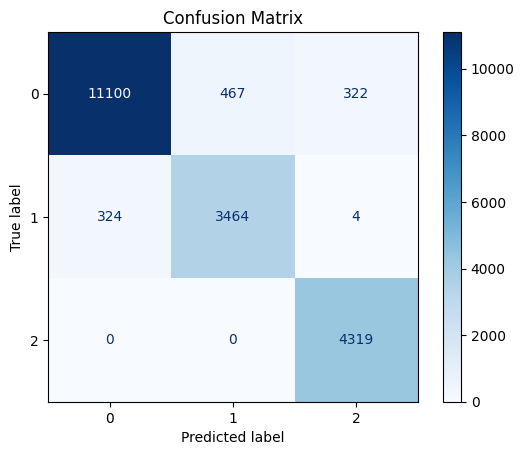

In [38]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the OneVsRestClassifier with Logistic Regression
LR_OVO = OneVsOneClassifier(LogisticRegression()).fit(x_train, y_train)

# Make predictions
LR_OVO_prediction = LR_OVO.predict(x_test)

# Print accuracy
print("Accuracy :", accuracy_score(y_test, LR_OVO_prediction))

# Print classification report
print(classification_report(y_test, LR_OVO_prediction))

# Compute confusion matrix
cm = confusion_matrix(y_test, LR_OVO_prediction)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

## SVC with One Vs One

Accuracy: 0.9592
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     11889
           1       0.94      0.92      0.93      3792
           2       0.94      1.00      0.97      4319

    accuracy                           0.96     20000
   macro avg       0.95      0.96      0.95     20000
weighted avg       0.96      0.96      0.96     20000



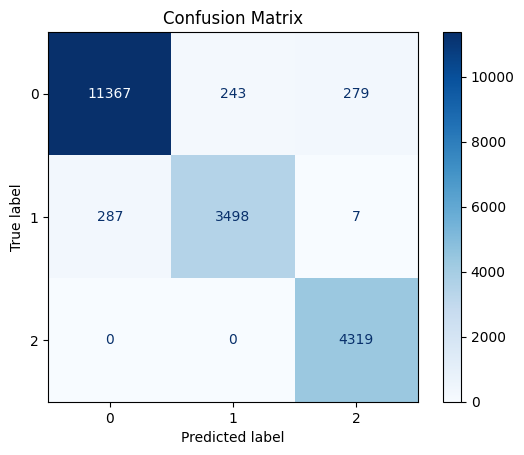

In [39]:
# Train the OneVsOneClassifier with SVC
SVC_OVO = OneVsOneClassifier(SVC()).fit(x_train, y_train)

# Make predictions
SVC_OVO_prediction = SVC_OVO.predict(x_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, SVC_OVO_prediction))

# Print classification report
print(classification_report(y_test, SVC_OVO_prediction))

# Compute confusion matrix
cm = confusion_matrix(y_test, SVC_OVO_prediction)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

## SVC with One VS Rest

Accuracy: 0.95545
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     11889
           1       0.93      0.92      0.93      3792
           2       0.92      1.00      0.96      4319

    accuracy                           0.96     20000
   macro avg       0.94      0.96      0.95     20000
weighted avg       0.96      0.96      0.96     20000



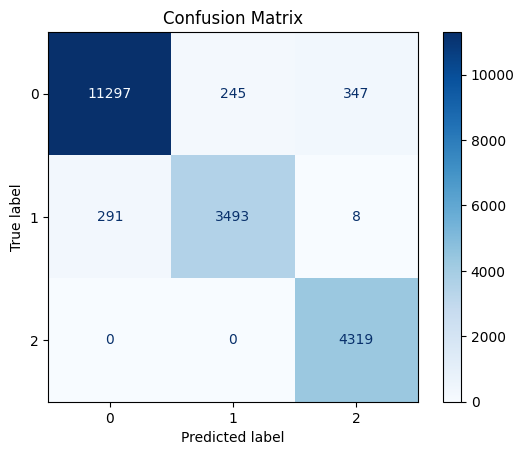

In [40]:
# Train the OneVsRestClassifier with SVC
SVC_OVR = OneVsRestClassifier(SVC()).fit(x_train, y_train)

# Make predictions
SVC_OVR_prediction = SVC_OVR.predict(x_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, SVC_OVR_prediction))

# Print classification report
print(classification_report(y_test, SVC_OVR_prediction))

# Compute confusion matrix
cm = confusion_matrix(y_test, SVC_OVR_prediction)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

## K-Nearest Neighbor

Accuracy: 0.9363
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11889
           1       0.92      0.93      0.92      3792
           2       0.88      0.97      0.92      4319

    accuracy                           0.94     20000
   macro avg       0.92      0.94      0.93     20000
weighted avg       0.94      0.94      0.94     20000



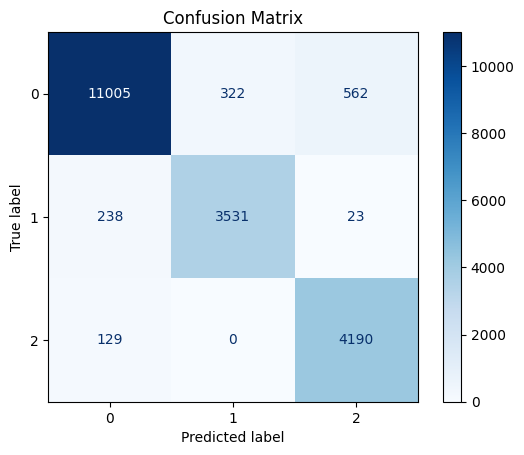

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming x_train, y_train, x_test, y_test are already defined

# Train the KNeighborsClassifier
knn = KNeighborsClassifier().fit(x_train, y_train)

# Make predictions
knn_predictions = knn.predict(x_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, knn_predictions))

# Print classification report
print(classification_report(y_test, knn_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, knn_predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 51)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best value for n_neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best n_neighbors: {best_n_neighbors}")

Best n_neighbors: 3


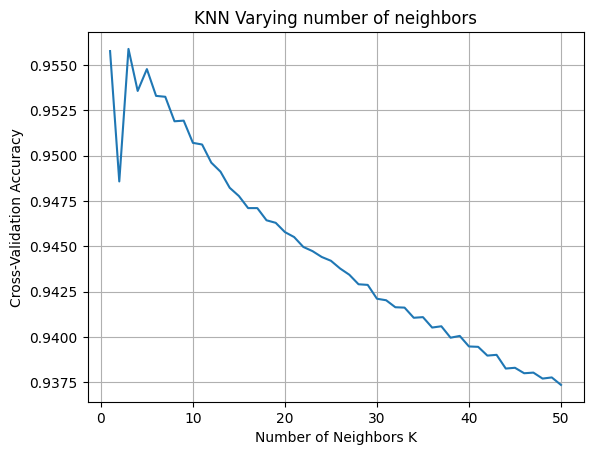

Best n_neighbors: 3


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Range of n_neighbors to test
neighbors_range = range(1, 51)
cv_scores = []

# Perform cross-validation for each value of n_neighbors
for n in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the cross-validation scores
plt.plot(neighbors_range, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Varying number of neighbors')
plt.grid(True)
plt.show()

# Find the best number of neighbors
best_n_neighbors = neighbors_range[cv_scores.index(max(cv_scores))]
print(f"Best n_neighbors: {best_n_neighbors}")

Accuracy: 0.93545
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11889
           1       0.91      0.93      0.92      3792
           2       0.89      0.97      0.93      4319

    accuracy                           0.94     20000
   macro avg       0.92      0.94      0.93     20000
weighted avg       0.94      0.94      0.94     20000



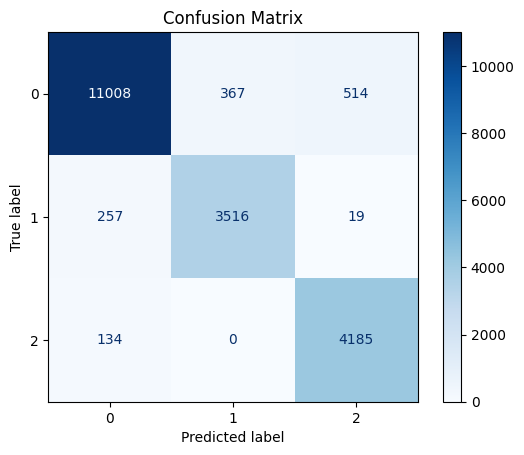

In [44]:
# Train the KNeighborsClassifier with k = 3
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

# Make predictions
knn_predictions = knn.predict(x_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, knn_predictions))

# Print classification report
print(classification_report(y_test, knn_predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test, knn_predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

## Decision Tree One Vs One

Accuracy: 0.954
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     11889
           1       0.85      0.93      0.89      3792
           2       0.99      1.00      1.00      4319

    accuracy                           0.95     20000
   macro avg       0.94      0.96      0.95     20000
weighted avg       0.96      0.95      0.95     20000



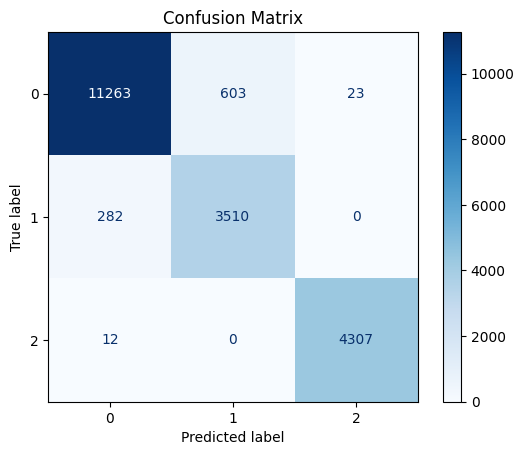

In [45]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Train the OneVsOneClassifier with Decision Tree
DT_OVO = OneVsOneClassifier(DecisionTreeClassifier()).fit(x_train, y_train)

# Make predictions
DT_OVO_prediction = DT_OVO.predict(x_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, DT_OVO_prediction))

# Print classification report
print(classification_report(y_test, DT_OVO_prediction))

# Compute confusion matrix
cm = confusion_matrix(y_test, DT_OVO_prediction)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()


## Decision Tree

Accuracy: 0.95465
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     11889
           1       0.85      0.93      0.89      3792
           2       1.00      1.00      1.00      4319

    accuracy                           0.95     20000
   macro avg       0.94      0.96      0.95     20000
weighted avg       0.96      0.95      0.96     20000



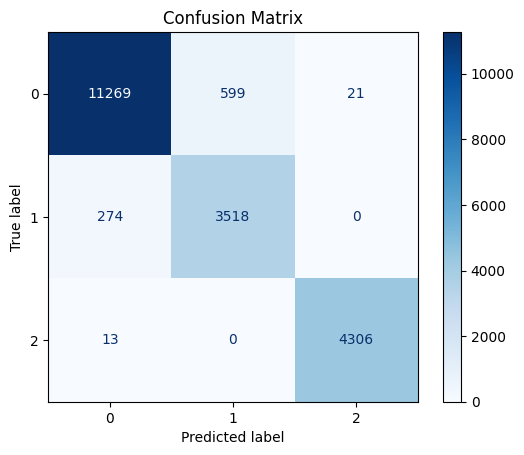

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Train the Decision Tree classifier
dt = DecisionTreeClassifier().fit(x_train, y_train)

# Make predictions
dt_prediction = dt.predict(x_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, dt_prediction))

# Print classification report
print(classification_report(y_test, dt_prediction))

# Compute confusion matrix
cm = confusion_matrix(y_test, dt_prediction)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()


## Random Forest

Accuracy: 0.9724
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11889
           1       0.93      0.93      0.93      3792
           2       1.00      1.00      1.00      4319

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



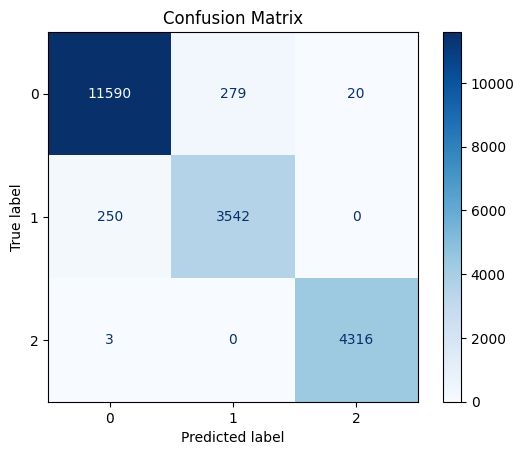

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Train the Random Forest classifier
RF = RandomForestClassifier().fit(x_train, y_train)

# Make predictions
RF_prediction = RF.predict(x_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, RF_prediction))

# Print classification report
print(classification_report(y_test, RF_prediction))

# Compute confusion matrix
cm = confusion_matrix(y_test, RF_prediction)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()


## Naive Bayes

Accuracy: 0.9282
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     11889
           1       0.80      0.88      0.84      3792
           2       0.98      0.99      0.98      4319

    accuracy                           0.93     20000
   macro avg       0.91      0.93      0.92     20000
weighted avg       0.93      0.93      0.93     20000



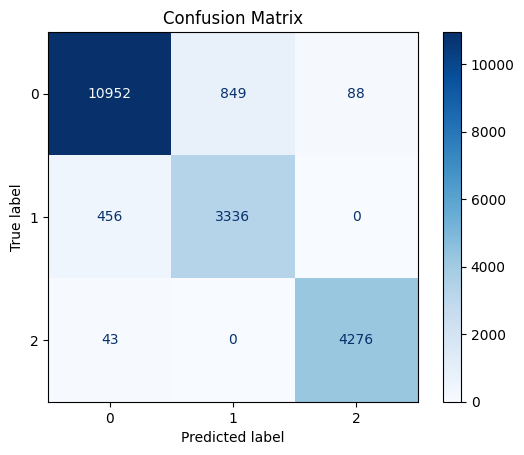

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Train the Naive Bayes classifier
NB = GaussianNB().fit(x_train, y_train)

# Make predictions
NB_prediction = NB.predict(x_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, NB_prediction))

# Print classification report
print(classification_report(y_test, NB_prediction))

# Compute confusion matrix
cm = confusion_matrix(y_test, NB_prediction)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()


## Gradient Boosting

Accuracy: 0.96665
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     11889
           1       0.92      0.93      0.92      3792
           2       0.98      1.00      0.99      4319

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000



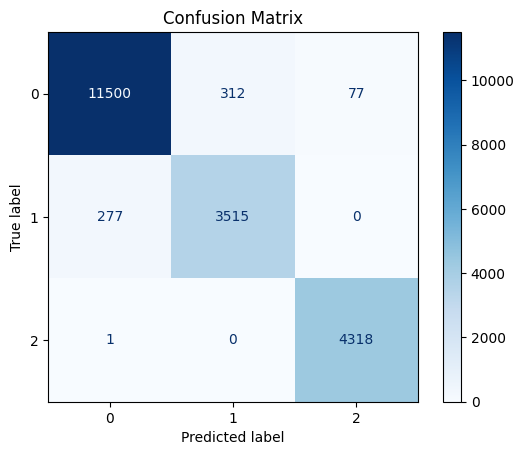

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Train the Gradient Boosting classifier
GB = GradientBoostingClassifier().fit(x_train, y_train)

# Make predictions
GB_prediction = GB.predict(x_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, GB_prediction))

# Print classification report
print(classification_report(y_test, GB_prediction))

# Compute confusion matrix
cm = confusion_matrix(y_test, GB_prediction)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()


# Export Model

In [50]:
import pickle

pickle.dump(RF, open('model.pkl', 'wb'))

In [51]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))